In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gc
import os
import glob
import os.path as osp
from PIL import Image
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils import data as D
import torch.nn as nn

In [2]:
path = './all/train_images/'

## Make class for the dataset
Following the tutorial on:
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel
This class contains the resize and normalize transformations

In [3]:
import torch
from torch.utils import data

class PlanktonDS(data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, root, list_IDs, labels):
        'Initialization'
        self.labels = labels
        self.list_IDs = list_IDs
        
        
        self.filenames = []
        self.root = root
        self.transform = transforms.Compose([
    transforms.Resize((35,35)), ## @Delano ik heb dit veranderd want CNN tutorial heeft dit ook is voor nu even makkelijker MAAR DIT IS NIET JUIST WANT DE PLAATJES ZIJN TE KLEIN NU 
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        filenames = glob.glob(osp.join(path, '*.jpg'))
        for fn in filenames:
            self.filenames.append(fn)

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_IDs)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.list_IDs[index]

        # Load data and get label
        X = Image.open(self.filenames[index])
        y = self.labels[ID]

        return self.transform(X), y

## Hyperparameters

In [4]:
# Batch size as used in the DataLoader
batch_size = 1

## Loading the labels 

In [5]:
labels_read = pd.read_csv('./all/train_onelabel.csv')
images = labels_read['image'].tolist()
import random
random.shuffle(images)

threshold = int(len(images) *0.7)

partition = {}
partition['train'] = images[:threshold]
partition['validation'] = images[threshold:]


labels = dict(zip(labels_read['image'], labels_read['class'])) 


In [6]:
#Loading the actual data
training_set = PlanktonDS(path, partition['train'], 
                               labels)
training_generator = data.DataLoader(dataset=training_set,
                                           batch_size=batch_size,
                                           shuffle=True)

validation_set = PlanktonDS(path, partition['validation'], 
                               labels)
validation_generator = data.DataLoader(dataset=validation_set,
                                           batch_size=batch_size,
                                           shuffle=True)


In [7]:
num_classes = pd.read_csv('./all/label_map.txt').shape[0]
print('The number of classes is:',num_classes)



The number of classes is: 120


## EDA

tensor([71])


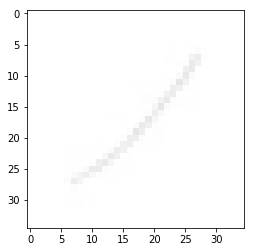

In [8]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(training_generator)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
print(labels)

In [9]:
print('The length of training set is:' ,len(training_generator))
print('The length of validation set is:' ,len(validation_generator))

The length of training set is: 16942
The length of validation set is: 7262


In [10]:
# How big is an image
for i in range(3):
    image = training_set[i]
    print(image[0].shape)

torch.Size([1, 35, 35])
torch.Size([1, 35, 35])
torch.Size([1, 35, 35])


In [11]:
training_set[91]

(tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]]]), 26)

In [12]:
alle_train_classes = []
for i in range(len(training_set)):
    print(training_set[i][1])
    alle_train_classes.append(training_set[i][1])
    

14
40
78
22
105
49
22
73
34
66
12
72
84
41
58
50
70
53
46
32
26
81
8
26
38
114
34
81
12
113
34
31
0
58
113
12
84
21
112
119
32
105
114
17
8
83
94
73
76
8
39
3
114
6
3
117
100
58
105
70
104
8
70
67
20
31
26
42
114
3
101
27
34
36
84
45
113
26
29
53
0
27
84
70
42
12
117
0
32
105
8
26
94
21
49
67
12
84
53
58
84
105
27
102
113
26
68
46
53
81
81
70
99
69
27
27
22
101
11
18
61
8
118
45
46
8
3
34
36
45
31
58
12
20
59
27
17
0
12
84
84
66
11
22
101
26
26
67
21
31
58
5
105
84
105
84
81
6
36
3
84
84
69
27
81
9
84
12
45
76
111
119
49
8
49
17
31
105
106
99
32
8
117
39
19
105
0
43
84
58
51
117
36
34
58
72
49
52
70
100
100
46
58
45
117
72
29
32
5
99
118
45
59
39
98
100
12
60
84
84
100
111
0
58
78
56
99
12
53
12
117
22
53
49
84
51
105
70
73
59
58
67
36
73
84
26
45
74
101
27
84
2
0
76
81
114
34
1
54
84
61
58
34
99
111
67
12
64
101
12
26
35
32
58
43
81
84
84
113
7
64
84
32
92
21
84
1
113
105
27
8
68
105
99
104
45
58
46
99
84
67
119
27
94
34
27
3
70
117
99
104
46
100
78
119
37
7
59
45
16
6
56
58
84
21
105

75
34
80
47
18
67
119
68
114
12
58
34
53
68
58
8
28
117
105
12
101
84
100
84
27
84
38
12
67
101
101
100
27
100
60
70
117
117
99
50
76
34
84
76
6
84
99
12
117
12
81
105
40
58
94
84
24
3
47
87
81
11
46
32
21
29
105
81
53
99
4
78
11
94
26
24
21
100
58
67
27
6
105
91
1
117
8
24
84
53
84
86
29
119
29
58
53
119
81
17
12
34
0
2
100
116
71
67
64
64
21
11
84
43
48
84
27
58
105
70
24
101
12
21
58
17
94
8
104
58
49
84
49
17
58
113
24
118
58
34
64
58
99
3
34
75
36
99
45
58
71
117
5
66
100
105
26
49
3
120
37
59
34
34
84
67
84
62
12
4
81
58
100
23
112
100
67
22
31
101
104
26
29
101
22
61
67
53
110
94
84
12
11
53
117
36
0
97
12
119
12
42
32
45
81
26
45
84
66
0
94
36
24
12
43
3
105
84
3
114
35
100
117
37
12
117
84
53
59
11
2
45
18
84
21
112
105
99
66
84
67
17
6
11
12
84
111
70
58
52
8
58
93
61
58
4
99
36
45
44
58
53
31
84
58
113
70
75
11
92
84
113
34
11
45
86
99
49
43
84
80
84
112
105
45
37
40
58
67
70
1
26
27
94
100
100
53
32
12
22
24
58
61
58
11
67
56
105
43
32
117
24
12
117
0
119
117
21
105
84
31
2

20
113
8
12
51
8
18
58
27
84
26
61
34
114
11
72
26
0
53
29
100
108
34
3
115
112
84
8
21
36
105
3
27
12
45
23
27
99
105
84
84
116
101
105
113
73
36
42
58
8
58
52
119
12
49
0
23
8
58
43
77
112
117
27
31
119
24
21
84
84
32
61
58
84
100
32
45
112
100
43
58
61
84
6
84
94
105
26
36
58
3
30
45
3
11
58
84
111
116
29
81
3
74
84
105
92
3
107
99
84
74
99
34
34
0
12
101
3
104
100
117
38
31
17
23
61
99
26
69
101
26
76
18
22
58
35
52
70
100
23
36
119
76
24
53
53
45
59
12
73
24
29
38
105
58
54
19
24
100
67
105
5
73
34
84
70
32
45
64
73
99
49
115
3
58
12
26
49
34
58
84
9
84
84
101
84
60
3
93
77
61
21
117
78
61
103
81
17
58
49
3
43
45
104
19
8
58
53
58
101
43
114
58
56
2
64
99
99
72
34
116
84
46
32
12
109
119
3
111
26
61
32
37
26
94
42
70
53
31
75
34
14
17
119
99
34
99
83
32
2
22
89
84
105
22
101
94
60
58
58
3
105
27
16
45
25
58
105
67
26
81
32
99
93
22
15
5
34
37
34
118
43
5
49
14
62
70
58
32
1
23
99
31
8
43
21
67
58
107
8
12
67
50
43
21
42
58
84
58
100
11
16
21
34
45
105
100
21
59
58
34
34
99
82
64
9

103
6
22
62
117
26
104
117
99
99
105
105
67
101
38
12
119
70
94
11
105
98
29
36
26
6
46
105
84
84
81
76
119
8
101
99
24
27
70
53
58
100
101
105
73
81
81
67
84
84
61
117
31
0
3
60
58
36
36
84
12
23
84
84
27
21
0
119
45
59
84
36
53
70
58
84
111
84
17
61
11
84
66
3
102
112
36
84
75
66
70
105
92
84
24
117
3
113
112
84
105
58
8
24
92
84
67
105
12
18
103
84
58
36
58
26
59
4
67
74
84
43
21
105
45
84
45
22
67
110
17
58
105
49
105
45
101
14
20
16
28
84
101
44
26
58
26
43
61
58
73
28
45
8
50
104
67
105
32
34
68
63
53
12
81
17
61
114
117
84
49
26
45
26
81
84
11
99
31
99
110
81
0
117
99
58
58
117
84
61
61
3
58
49
1
8
117
27
94
99
58
105
45
26
8
52
21
45
58
8
70
110
24
42
1
84
76
99
84
58
70
29
84
6
3
44
61
61
59
100
58
84
84
67
104
42
84
99
5
58
45
24
94
45
52
61
84
81
76
97
56
36
94
42
26
105
38
89
67
5
70
70
27
101
18
53
56
66
36
66
100
84
58
99
99
24
49
117
32
43
67
72
81
58
6
73
26
28
104
20
113
12
101
110
58
58
27
67
105
22
99
118
18
105
84
24
31
27
40
8
12
8
8
105
11
105
53
8
3
43
58
100
3
1

49
70
22
46
58
66
117
45
36
84
112
58
99
105
58
117
0
36
84
105
84
97
23
117
26
27
24
67
99
22
58
104
84
70
94
1
3
105
26
58
99
119
113
26
59
113
3
53
12
105
117
8
24
63
3
34
32
70
48
101
12
81
21
32
118
99
30
117
101
58
84
12
12
84
26
105
22
84
117
34
36
105
94
70
100
8
116
8
17
100
0
38
24
112
8
24
101
117
104
57
3
44
34
21
111
100
76
3
77
78
34
61
53
84
31
84
58
3
49
6
100
58
12
110
58
31
84
34
31
89
112
58
101
27
72
84
105
119
21
112
105
112
100
74
84
107
67
78
21
12
3
26
67
117
32
31
112
99
76
26
104
73
11
109
32
0
32
45
28
100
36
84
76
1
5
45
71
34
5
11
36
56
70
37
31
84
119
31
101
49
3
21
89
119
110
84
112
58
6
117
58
84
17
12
58
3
8
42
5
112
12
45
45
56
34
99
105
84
25
53
23
100
26
11
36
2
3
114
100
84
24
117
12
40
26
58
22
28
56
36
58
58
70
53
97
58
84
58
76
34
3
28
19
94
94
104
8
67
101
10
43
44
26
99
101
63
40
3
43
17
3
71
26
42
12
3
12
47
8
29
58
79
12
11
94
46
0
51
74
22
84
24
90
84
4
58
58
113
96
44
97
8
115
94
117
70
67
45
8
27
84
8
119
27
61
73
94
99
8
101
84
4
6
3
58
4

105
99
56
38
84
84
26
96
21
67
58
117
91
5
49
58
61
34
3
12
56
72
45
43
104
21
53
113
36
12
28
53
3
8
71
119
49
117
69
99
12
48
0
12
40
26
2
84
99
105
84
76
101
16
16
18
31
119
70
100
99
11
84
74
21
70
58
8
71
88
27
66
84
27
77
84
23
114
94
104
24
68
100
117
3
3
20
36
45
28
58
117
117
1
67
37
45
111
105
31
32
84
44
8
104
101
21
67
31
99
38
31
26
26
49
45
104
58
32
56
56
34
31
0
49
58
36
99
32
84
5
99
32
53
81
49
20
12
32
17
84
113
11
99
119
105
58
16
100
3
29
16
99
119
7
28
31
109
58
119
12
99
70
3
84
52
17
6
32
100
100
68
58
89
105
11
100
84
67
105
22
70
53
70
99
49
27
105
38
34
25
58
49
101
31
49
68
99
58
81
67
23
94
0
45
53
34
63
7
100
34
45
52
21
112
43
31
0
61
119
12
61
8
67
94
34
96
105
3
31
46
3
70
119
5
1
89
43
45
26
99
81
0
105
99
67
8
101
12
103
27
36
56
105
31
117
31
119
114
84
94
18
105
114
117
32
11
54
8
105
58
50
45
84
31
50
61
117
78
80
72
57
51
58
105
12
12
3
104
31
27
45
93
100
84
26
99
100
15
101
32
27
26
67
101
8
84
100
11
67
94
50
99
26
34
32
104
58
58
67
5
23
88
84

24
58
105
84
45
49
3
42
117
8
31
3
58
99
34
58
67
58
102
58
61
71
104
101
84
99
58
6
45
67
0
119
31
58
0
3
53
6
17
100
105
50
43
5
99
34
3
74
43
3
101
7
84
111
100
109
27
105
94
32
22
50
21
5
14
70
101
31
58
58
64
105
84
27
4
58
26
8
50
31
84
12
116
84
32
17
117
27
31
105
99
58
51
42
114
118
6
12
101
45
12
49
53
1
97
113
86
64
16
105
22
21
73
84
53
100
112
112
21
28
16
116
12
49
101
21
21
104
66
101
3
106
61
81
53
37
65
29
119
111
66
92
42
45
110
2
34
40
45
46
31
44
70
26
58
71
99
36
101
56
4
88
3
9
12
43
81
45
58
84
89
84
58
11
34
26
101
105
58
117
114
22
49
119
67
43
26
118
104
67
29
34
88
3
45
61
58
77
45
105
105
81
105
24
36
36
61
67
98
104
84
89
3
6
17
43
26
1
101
2
36
26
27
15
43
50
58
59
72
99
84
104
100
84
43
3
114
75
84
0
74
21
28
32
58
24
58
70
84
0
28
20
101
117
31
39
24
66
99
110
70
26
58
105
117
32
53
111
34
113
6
81
88
58
61
87
58
21
21
17
3
117
58
42
84
94
34
105
58
43
101
94
34
17
84
49
84
70
7
12
43
53
3
18
67
3
21
99
36
8
99
12
26
6
66
28
3
28
32
16
21
84
49
22
11
26


In [13]:
alle_train_classes_unique = list(set(alle_train_classes))

len(alle_train_classes_unique)

121

## Structure of DL
Tutorial https://blog.algorithmia.com/convolutional-neural-nets-in-pytorch/
https://heartbeat.fritz.ai/basics-of-image-classification-with-pytorch-2f8973c51864

In [22]:
from torch.autograd import Variable
import torch.nn.functional as F

class SimpleCNN(torch.nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(8*8*32, 121) ## DEZE 121 moet blijven staan
        
    def forward(self, x):
        out = self.layer1(x)
#         print('1', out.shape)
        out = self.layer2(out)
#         print('2', out.shape)
        out = out.view(out.size(0), -1)
#         print('3', out.shape)
        out = self.fc(out)
#         print('4', out.shape)
        
        return out

In [15]:
import torch.optim as optim

def createLossAndOptimizer(net, learning_rate=0.001):
    
    #Loss function
    loss = torch.nn.CrossEntropyLoss()
    
    #Optimizer
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    
    return(loss, optimizer)

In [20]:
import time

def trainNet(net, batch_size, n_epochs, learning_rate):
    
    #Print all of the hyperparameters of the training iteration:
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    
    #Get training data
    train_loader = training_generator
    n_batches = len(train_loader)
    
    #Create our loss and optimizer functions
    loss, optimizer = createLossAndOptimizer(net, learning_rate)
    
    #Time for printing
    training_start_time = time.time()
    
    #Loop for n_epochs
    for epoch in range(n_epochs):
        
        running_loss = 0.0
        print_every = n_batches // 10
        start_time = time.time()
        total_train_loss = 0
        
        for i, data in enumerate(train_loader, 0):
            
            #Get inputs
            inputs, labels = data
            
            #Wrap them in a Variable object
            inputs, labels = Variable(inputs), Variable(labels)
            
            #Set the parameter gradients to zero
            optimizer.zero_grad()
            
            #Forward pass, backward pass, optimize
            outputs = net(inputs)
            loss_size = loss(outputs, labels)
            loss_size.backward()
            optimizer.step()
            
            #Print statistics
            running_loss += loss_size.data[0]
            total_train_loss += loss_size.data[0]
            
            #Print every 10th batch of an epoch
            if (i + 1) % (print_every + 1) == 0:
                print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                        epoch+1, int(100 * (i+1) / n_batches), running_loss / print_every, time.time() - start_time))
                #Reset running loss and time
                running_loss = 0.0
                start_time = time.time()
            
        #At the end of the epoch, do a pass on the validation set
        total_val_loss = 0
        for inputs, labels in validation_generator:
            
            #Wrap tensors in Variables
            inputs, labels = Variable(inputs), Variable(labels)
            
            #Forward pass
            val_outputs = net(inputs)
            val_loss_size = loss(val_outputs, labels)
            total_val_loss += val_loss_size.data[0]
            
        print("Validation loss = {:.2f}".format(total_val_loss / len(validation_generator)))
        
    print("Training finished, took {:.2f}s".format(time.time() - training_start_time))

In [23]:
CNN = SimpleCNN()
trainNet(CNN, batch_size=5, n_epochs=1, learning_rate=0.001)

##LET OP ik heb de n_opochs nu op 1 gezet, is t snelst voor nu

===== HYPERPARAMETERS =====
batch_size= 5
epochs= 15
learning_rate= 0.001


C:\Users\Jeffr\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
C:\Users\Jeffr\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch 1, 10% 	 train_loss: 4.49 took: 8.99s
Epoch 1, 20% 	 train_loss: 4.24 took: 12.78s
Epoch 1, 30% 	 train_loss: 4.24 took: 15.19s
Epoch 1, 40% 	 train_loss: 4.26 took: 16.45s
Epoch 1, 50% 	 train_loss: 4.20 took: 18.45s
Epoch 1, 60% 	 train_loss: 4.21 took: 21.01s
Epoch 1, 70% 	 train_loss: 4.21 took: 25.03s
Epoch 1, 80% 	 train_loss: 4.19 took: 27.00s
Epoch 1, 90% 	 train_loss: 4.17 took: 25.82s


C:\Users\Jeffr\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Validation loss = 4.18
Epoch 2, 10% 	 train_loss: 4.11 took: 27.36s
Epoch 2, 20% 	 train_loss: 4.18 took: 27.00s
Epoch 2, 30% 	 train_loss: 4.13 took: 27.95s
Epoch 2, 40% 	 train_loss: 4.18 took: 27.24s
Epoch 2, 50% 	 train_loss: 4.15 took: 28.71s
Epoch 2, 60% 	 train_loss: 4.17 took: 27.78s
Epoch 2, 70% 	 train_loss: 4.16 took: 28.61s
Epoch 2, 80% 	 train_loss: 4.15 took: 27.31s
Epoch 2, 90% 	 train_loss: 4.19 took: 28.48s
Validation loss = 4.19
Epoch 3, 10% 	 train_loss: 4.09 took: 27.69s
Epoch 3, 20% 	 train_loss: 4.11 took: 27.99s
Epoch 3, 30% 	 train_loss: 4.08 took: 27.92s
Epoch 3, 40% 	 train_loss: 4.12 took: 28.26s
Epoch 3, 50% 	 train_loss: 4.13 took: 28.42s
Epoch 3, 60% 	 train_loss: 4.13 took: 28.60s
Epoch 3, 70% 	 train_loss: 4.13 took: 28.67s
Epoch 3, 80% 	 train_loss: 4.17 took: 28.53s
Epoch 3, 90% 	 train_loss: 4.19 took: 28.40s
Validation loss = 4.20
Epoch 4, 10% 	 train_loss: 4.09 took: 31.12s
Epoch 4, 20% 	 train_loss: 4.08 took: 29.58s
Epoch 4, 30% 	 train_loss: 4.04

KeyboardInterrupt: 

## Use the model and test on the image directory
https://heartbeat.fritz.ai/basics-of-image-classification-with-pytorch-2f8973c51864